In [ ]:
# Maya Arvanitis
# October 29, 2024

## Simulating Cardiac Genes and their Interactions with a Basic Boolean Network

## 1. Implementing a Basic Boolean Network

Cardiac Boolean Gene Network Simulation

This simulation models a Boolean gene regulatory network for cardiac development, inspired by the approaches in Grieb et al. (2015) and Borriello & Daniels (2021).

Boolean networks are simplified models of gene interactions, where each gene is represented as being either "on" (1) or "off" (0).

This model uses Boolean rules to represent gene interactions that contribute to the development of heart tissue and function.

### Background
1. **Grieb et al. (2015)**: This study extended Boolean networks to model the variability in gene expression by incorporating uncertainty. Focusing on cardiac development, the authors modeled the gene regulatory network controlling cardiac progenitor cell differentiation. Using Boolean logic, the study explored how cardiac progenitor cells in the first and second heart fields differentiate into various heart structures. By using Boolean states to represent gene expression, Boolean networks allowed the study to predict stable states (attractors) that correspond to specific biological phenotypes.

2. **Borriello & Daniels (2021)**: This paper examined how biological Boolean networks could be controlled by targeting minimal sets of genes, known as control kernels. The findings showed that the control of a biological system might often be achieved with a surprisingly small number of genes, scaling logarithmically with the number of attractors in the network. These insights are relevant for understanding how to influence or reset cardiac networks during diseases by targeting key genes.

### Objective
This simulation is inspired by the goal of exploring cardiac diseases within a Boolean network framework. Specifically, we introduce a "disease state" by modifying the Boolean rules and initial conditions of certain cardiac genes to simulate:
   - Overexpression of *Nkx2.5*, a transcription factor critical in heart development.
   - Loss of function in *Tbx5*, another important cardiac transcription factor.

These modifications aim to mimic pathological conditions such as congenital heart defects or heart disease, where gene expression changes disrupt normal heart development. By comparing the network dynamics in healthy versus diseased conditions, we can observe the impact of genetic perturbations on cardiac gene interactions.

### Code Outline
1. **Gene Definitions and Initial States**: Defines key cardiac genes (*Isl1*, *Nkx2.5*, and *Tbx5*) and their initial states for healthy and diseased conditions.
2. **Boolean Update Functions**: Implements Boolean rules for each gene, reflecting how its state is influenced by other genes in the network under both healthy and diseased conditions.
3. **Simulation Function**: Runs the network for a specified number of steps, recording each gene's state to observe attractors (stable states).
4. **Visualization**: Plots the state of each gene over time to highlight differences between healthy and diseased network dynamics.

### Expected Outcome
By simulating this network, we expect to see different attractors and dynamic behaviors in the diseased network compared to the healthy one, illustrating how overexpression and loss-of-function mutations alter gene regulatory interactions in cardiac tissue.

References:
1. Grieb M, et al. (2015) "Predicting Variabilities in Cardiac Gene Expression with a Boolean Network Incorporating Uncertainty." PLoS ONE 10(7): e0131832.
2. Borriello E, Daniels BC. (2021) "The basis of easy controllability in Boolean networks." Nature Communications 12:5227.

Note:

- Each gene will have state of 0 or 1
- The state of each gene at the next time step depends on the states of other genes according to defined rules.

In [ ]:
#Imports

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define the initial states of genes (0 = off, 1 = on)
# Let's assume we have three genes: Isl1, Nkx2.5, and Tbx5
genes = ["Isl1", "Nkx2.5", "Tbx5"]
initial_state = {"Isl1": 1, "Nkx2.5": 0, "Tbx5": 1}

In [ ]:
# Define the Boolean rules for the network
# Each rule defines how the state of a specific gene is updated based on the current states
# of other genes in the network. These rules represent regulatory relationships.

def update_Isl1(current_state):
    """
    Update the state of the gene 'Isl1'.

    Logic:
    - 'Isl1' remains active (1) only if it is currently active and 'Nkx2.5' is inactive.
    - This implies that 'Nkx2.5' suppresses the activity of 'Isl1'.

    Parameters:
    - current_state (dict): A dictionary where keys are gene names (e.g., "Isl1", "Nkx2.5")
      and values are their current states (0 = inactive, 1 = active).

    Returns:
    - int: The updated state of 'Isl1' (0 or 1).
    """
    return current_state["Isl1"] and not current_state["Nkx2.5"]


def update_Nkx2_5(current_state):
    """
    Update the state of the gene 'Nkx2.5'.

    Logic:
    - 'Nkx2.5' is active (1) if either:
        a) 'Isl1' is active (1), OR
        b) 'Tbx5' is inactive (0).
    - This means that 'Nkx2.5' can be activated by 'Isl1' or when 'Tbx5' is suppressed.

    Parameters:
    - current_state (dict): A dictionary where keys are gene names (e.g., "Isl1", "Tbx5")
      and values are their current states (0 = inactive, 1 = active).

    Returns:
    - int: The updated state of 'Nkx2.5' (0 or 1).
    """
    return current_state["Isl1"] or not current_state["Tbx5"]


def update_Tbx5(current_state):
    """
    Update the state of the gene 'Tbx5'.

    Logic:
    - 'Tbx5' is active (1) if 'Nkx2.5' is inactive (0).
    - This implies that 'Nkx2.5' has an inhibitory effect on 'Tbx5'.

    Parameters:
    - current_state (dict): A dictionary where keys are gene names (e.g., "Nkx2.5")
      and values are their current states (0 = inactive, 1 = active).

    Returns:
    - int: The updated state of 'Tbx5' (0 or 1).
    """
    return not current_state["Nkx2.5"]

In [ ]:
# Define a function to update the state of the entire network
def update_network(current_state):
    """
    Update the states of all genes in the network simultaneously based on their
    respective Boolean rules.

    Logic:
    - Each gene's state is updated according to its Boolean rule function
      (e.g., `update_Isl1`, `update_Nkx2_5`, `update_Tbx5`).
    - All updates are performed based on the current state of the network,
      ensuring synchronous updates (i.e., all genes are updated at the same time).

    Parameters:
    - current_state (dict): A dictionary where keys are gene names (e.g., "Isl1", "Nkx2.5", "Tbx5")
      and values are their current states (0 = inactive, 1 = active).

    Returns:
    - dict: A new dictionary representing the next state of the network, with the same keys
      (gene names) but updated values (gene states).
    """
    # Create a new dictionary to store the next states of all genes
    next_state = {
        "Isl1": update_Isl1(current_state),      # Update the state of 'Isl1'
        "Nkx2.5": update_Nkx2_5(current_state),  # Update the state of 'Nkx2.5'
        "Tbx5": update_Tbx5(current_state)       # Update the state of 'Tbx5'
    }

    # Return the updated state of the network
    return next_state

In [ ]:
# Simulate the network for a specified number of steps
def simulate_network(initial_state, steps=10):
    """
    Simulate the evolution of the Boolean network over a given number of steps.

    Logic:
    - Start from an initial state and iteratively update the network's state
      using the `update_network` function.
    - Keep track of the network's state at each step for analysis and visualization.
    - Stop the simulation early if the network reaches a stable state (attractor),
      where the state no longer changes between iterations.

    Parameters:
    - initial_state (dict): A dictionary where keys are gene names (e.g., "Isl1", "Nkx2.5", "Tbx5")
      and values are their initial states (0 = inactive, 1 = active).
    - steps (int): The maximum number of steps to simulate (default = 10).

    Returns:
    - list: A list of dictionaries representing the state of the network at each step,
      including the initial state and all subsequent states.
    """
    # Initialize a list to store the history of states; start with the initial state
    state_history = [initial_state]

    # Set the current state to the initial state
    current_state = initial_state

    # Iterate through the specified number of steps
    for step in range(steps):
        # Calculate the next state of the network
        next_state = update_network(current_state)

        # Append the new state to the history
        state_history.append(next_state)

        # Print the current step and state for observation
        print(f"Step {step + 1}: {next_state}")

        # Check if the network has reached a stable state (attractor)
        # An attractor is reached when the current state equals the next state
        if next_state == current_state:
            print("Attractor reached!")
            break

        # Update the current state for the next iteration
        current_state = next_state

    # Return the history of states
    return state_history

In [ ]:
# Run the simulation
simulate_network(initial_state, steps=10)

Step 1: {'Isl1': True, 'Nkx2.5': 1, 'Tbx5': True}
Step 2: {'Isl1': False, 'Nkx2.5': True, 'Tbx5': False}
Step 3: {'Isl1': False, 'Nkx2.5': True, 'Tbx5': False}
Attractor reached!


[{'Isl1': 1, 'Nkx2.5': 0, 'Tbx5': 1},
 {'Isl1': True, 'Nkx2.5': 1, 'Tbx5': True},
 {'Isl1': False, 'Nkx2.5': True, 'Tbx5': False},
 {'Isl1': False, 'Nkx2.5': True, 'Tbx5': False}]

## 2. Simulating Cardiac Disease

We will not introduce a "disease state" by forcing certain genes to behave differently than in a "healthy" network.

As a test, Assume the following:
- the disease causes *Nkx2.5* to be overexpressed so it is always "on"
- The disease causes a loss-of-function mutation in *Tbx5* so it is always "off"

From: https://pmc.ncbi.nlm.nih.gov/articles/PMC6750130/

The rules for Isl1, Nkx2.5, and Tbx5 simulate normal cardiac regulatory behavior.
Isl1 is suppressed by Nkx2.5.
Nkx2.5 is active if Isl1 is active or Tbx5 is inactive.
Tbx5 is inactive when Nkx2.5 is active.

In [ ]:
import numpy as np

# Define genes and initial states
genes = ["Isl1", "Nkx2.5", "Tbx5"]
initial_state_healthy = {"Isl1": 1, "Nkx2.5": 0, "Tbx5": 1}
initial_state_disease = {"Isl1": 1, "Nkx2.5": 1, "Tbx5": 0}  # Diseased conditions

# Define the Boolean rules for the healthy network
def update_Isl1_healthy(current_state):
    return current_state["Isl1"] and not current_state["Nkx2.5"]

def update_Nkx2_5_healthy(current_state):
    return current_state["Isl1"] or not current_state["Tbx5"]

def update_Tbx5_healthy(current_state):
    return not current_state["Nkx2.5"]

# Define the Boolean rules for the diseased network
def update_Isl1_disease(current_state):
    return current_state["Isl1"] and not current_state["Nkx2.5"]

def update_Nkx2_5_disease(current_state):
    return 1  # Overexpression: Nkx2.5 is always on in the disease state

def update_Tbx5_disease(current_state):
    return 0  # Loss of function: Tbx5 is always off in the disease state

# Update function for healthy and diseased networks
def update_network(current_state, disease=False):
    if disease:
        next_state = {
            "Isl1": update_Isl1_disease(current_state),
            "Nkx2.5": update_Nkx2_5_disease(current_state),
            "Tbx5": update_Tbx5_disease(current_state)
        }
    else:
        next_state = {
            "Isl1": update_Isl1_healthy(current_state),
            "Nkx2.5": update_Nkx2_5_healthy(current_state),
            "Tbx5": update_Tbx5_healthy(current_state)
        }
    return next_state

# Simulation function
def simulate_network(initial_state, steps=10, disease=False):
    state_history = [initial_state]
    current_state = initial_state

    print("\nStarting simulation with", "disease state:" if disease else "healthy state:")
    for step in range(steps):
        next_state = update_network(current_state, disease=disease)
        state_history.append(next_state)

        # Print current state
        print(f"Step {step + 1}: {next_state}")

        # Check for attractor (stable state)
        if next_state == current_state:
            print("Attractor reached!")
            break
        current_state = next_state

    return state_history

# Run simulation for healthy network
print("Simulating Healthy Network")
simulate_network(initial_state_healthy, steps=10, disease=False)

# Run simulation for diseased network
print("\nSimulating Diseased Network")
simulate_network(initial_state_disease, steps=10, disease=True)


Simulating Healthy Network

Starting simulation with healthy state:
Step 1: {'Isl1': True, 'Nkx2.5': 1, 'Tbx5': True}
Step 2: {'Isl1': False, 'Nkx2.5': True, 'Tbx5': False}
Step 3: {'Isl1': False, 'Nkx2.5': True, 'Tbx5': False}
Attractor reached!

Simulating Diseased Network

Starting simulation with disease state:
Step 1: {'Isl1': False, 'Nkx2.5': 1, 'Tbx5': 0}
Step 2: {'Isl1': False, 'Nkx2.5': 1, 'Tbx5': 0}
Attractor reached!


[{'Isl1': 1, 'Nkx2.5': 1, 'Tbx5': 0},
 {'Isl1': False, 'Nkx2.5': 1, 'Tbx5': 0},
 {'Isl1': False, 'Nkx2.5': 1, 'Tbx5': 0}]


Starting simulation with healthy state:
Step 1: {'Isl1': True, 'Nkx2.5': 1, 'Tbx5': True}
Step 2: {'Isl1': False, 'Nkx2.5': True, 'Tbx5': False}
Step 3: {'Isl1': False, 'Nkx2.5': True, 'Tbx5': False}
Attractor reached!


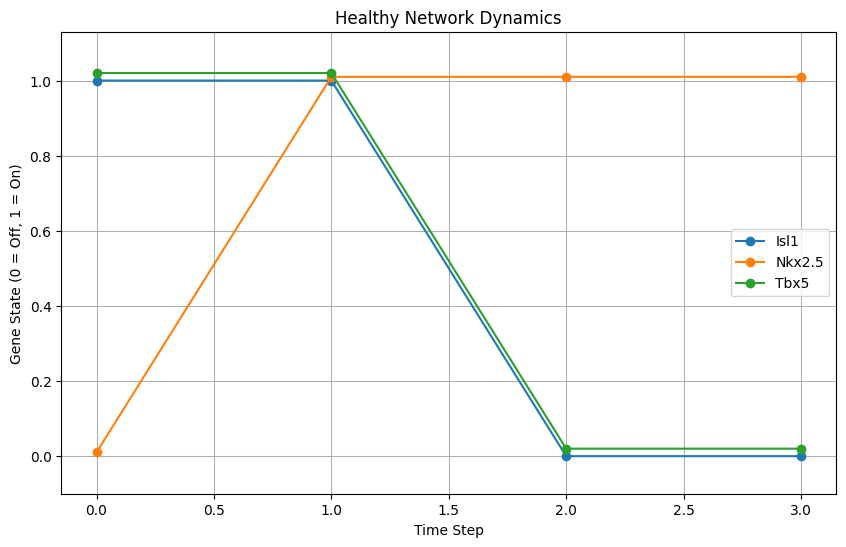


Starting simulation with disease state:
Step 1: {'Isl1': False, 'Nkx2.5': 1, 'Tbx5': 0}
Step 2: {'Isl1': False, 'Nkx2.5': 1, 'Tbx5': 0}
Attractor reached!


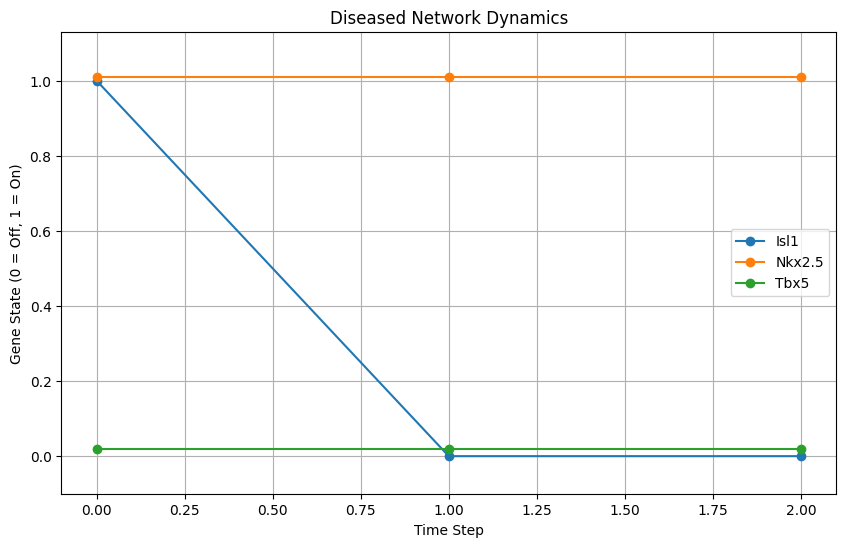

In [ ]:
# Updated plotting function to ensure all lines, even constant ones, are visible
def plot_gene_states(state_history, title="Network Dynamics"):
    time_steps = range(len(state_history))
    gene_states = {gene: [state[gene] for state in state_history] for gene in genes}

    plt.figure(figsize=(10, 6))
    for idx, (gene, states) in enumerate(gene_states.items()):
        # Add a slight vertical offset for each gene to avoid overlapping lines
        offset = idx * 0.01  # Small offset based on gene index
        states_with_offset = [state + offset for state in states]
        plt.plot(time_steps, states_with_offset, label=gene, marker="o")

    plt.xlabel("Time Step")
    plt.ylabel("Gene State (0 = Off, 1 = On)")
    plt.title(title)
    plt.ylim(-0.1, 1.1 + len(genes) * 0.01)  # Adjust y-axis to fit offsets
    plt.legend()
    plt.grid(True)
    plt.show()

# Re-run plots for healthy and diseased networks
healthy_history = simulate_network(initial_state_healthy, steps=10, disease=False)
plot_gene_states(healthy_history, title="Healthy Network Dynamics")

disease_history = simulate_network(initial_state_disease, steps=10, disease=True)
plot_gene_states(disease_history, title="Diseased Network Dynamics")


## 3. Incorporating Uncertainty: a fuzzy Boolean network

Incorporating uncertainty and fuzziness into a Boolean network as done by Grieb et al. (2015) involves transitioning from strict binary (0/1) states to a range of values between 0 and 1, which represent the "propensity" of each gene's expression. This approach, often called a fuzzy Boolean network, allows for intermediate values, capturing more nuanced gene expression levels and reflecting biological variability.



- Isl1: Stays "on" unless suppressed by Nkx2.5.
- Nkx2.5: Turns "on" if Isl1 is "on" or Tbx5 is "off."
- Tbx5: Stays "on" unless suppressed by Nkx2.5.

In [ ]:
'''
Replace standard Boolean operators with fuzzy counterparts:
AND becomes multiplication (A AND B → A * B).
OR becomes a sum minus the product (A OR B → A + B - (A * B)).
NOT becomes 1 - A.

RULES For genes are based on the following paper:
https://pmc.ncbi.nlm.nih.gov/articles/PMC6750130/
'''

'\nReplace standard Boolean operators with fuzzy counterparts:\nAND becomes multiplication (A AND B → A * B).\nOR becomes a sum minus the product (A OR B → A + B - (A * B)).\nNOT becomes 1 - A.\n\nRULES For genes are based on the following paper: \nhttps://pmc.ncbi.nlm.nih.gov/articles/PMC6750130/\n'

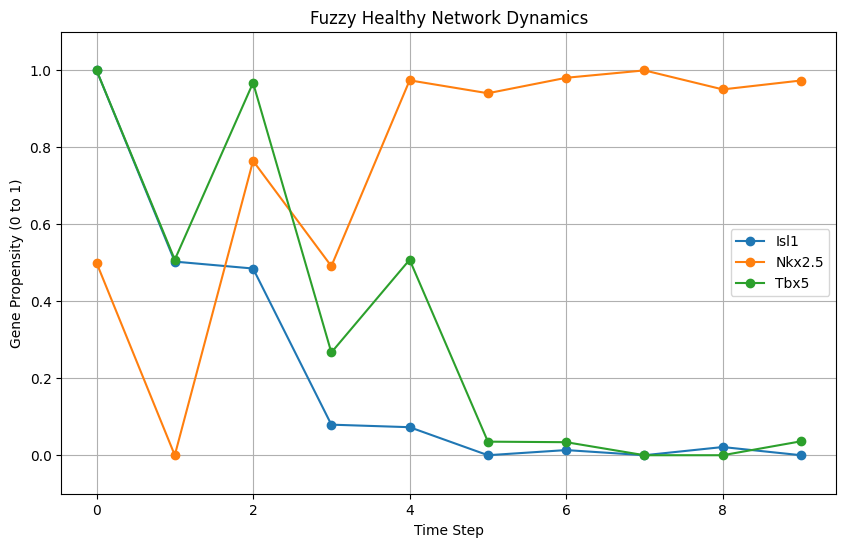

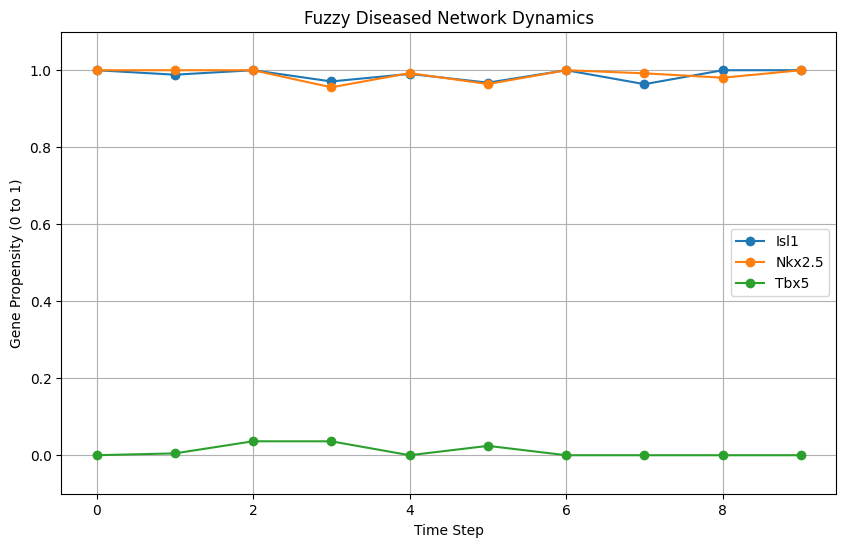

In [ ]:
# Define genes and initial fuzzy states (between 0 and 1 for fuzzy logic)
genes = ["Isl1", "Nkx2.5", "Tbx5"]
initial_state_healthy = {"Isl1": 1.0, "Nkx2.5": 0.5, "Tbx5": 1.0}
initial_state_disease = {"Isl1": 1.0, "Nkx2.5": 1.0, "Tbx5": 0.0}  # Diseased conditions with altered states

# Fuzzy logic functions
def fuzzy_and(a, b):
    return a * b

def fuzzy_or(a, b):
    return a + b - (a * b)

def fuzzy_not(a):
    return 1 - a

# Fuzzy update rules for the network in a healthy state
def update_Isl1_healthy(current_state):
    """
    Update Isl1 state in healthy conditions.
    - Isl1 is active (1) if it is not repressed by Nkx2.5.
    - Introduce a balance where Nkx2.5 strongly represses Isl1.
    """
    return fuzzy_not(current_state["Nkx2.5"]) * current_state["Isl1"]

def update_Nkx2_5_healthy(current_state):
    """
    Update Nkx2.5 state in healthy conditions.
    - Nkx2.5 is active if Isl1 is weak or Tbx5 is inactive.
    - Models repression of Isl1 activity.
    """
    return fuzzy_or(fuzzy_not(current_state["Isl1"]), fuzzy_not(current_state["Tbx5"]))


def update_Tbx5_healthy(current_state):
    """
    Update Tbx5 state in healthy conditions.
    - Tbx5 is active if Nkx2.5 is inactive.
    """
    return fuzzy_not(current_state["Nkx2.5"])

# Fuzzy update rules for the network in a diseased state
def update_Isl1_disease(current_state):
    """
    Update Isl1 state in diseased conditions.
    - Simulate Isl1 overexpression (e.g., reduced repression by Nkx2.5).
    """
    return 1.0  # Isl1 remains overexpressed in the disease state

def update_Nkx2_5_disease(current_state):
    """
    Update Nkx2.5 state in diseased conditions.
    - Simulate Nkx2-5 overexpression, which suppresses Isl1 regardless of feedback.
    """
    return 1.0  # Nkx2.5 remains overexpressed in the disease state

def update_Tbx5_disease(current_state):
    """
    Update Tbx5 state in diseased conditions.
    - Simulate loss of Tbx5 function.
    """
    return 0.0  # Tbx5 has a loss of function in the disease state

# Update function to introduce small random noise for uncertainty
def add_uncertainty(value, uncertainty=0.05):
    noise = np.random.uniform(-uncertainty, uncertainty)
    return min(1.0, max(0.0, value + noise))  # Ensure values stay in [0, 1]

# Update network function with fuzziness and uncertainty
def update_network(current_state, disease=False):
    if disease:
        next_state = {
            "Isl1": add_uncertainty(update_Isl1_disease(current_state)),
            "Nkx2.5": add_uncertainty(update_Nkx2_5_disease(current_state)),
            "Tbx5": add_uncertainty(update_Tbx5_disease(current_state))
        }
    else:
        next_state = {
            "Isl1": add_uncertainty(update_Isl1_healthy(current_state)),
            "Nkx2.5": add_uncertainty(update_Nkx2_5_healthy(current_state)),
            "Tbx5": add_uncertainty(update_Tbx5_healthy(current_state))
        }
    return next_state

# Simulation function with fuzzy states
def simulate_network(initial_state, steps=10, disease=False):
    state_history = []
    current_state = initial_state

    for step in range(steps):
        state_history.append(current_state)
        next_state = update_network(current_state, disease=disease)

        # Stop if an attractor is reached
        if next_state == current_state:
            state_history.append(next_state)
            break

        current_state = next_state

    return state_history

# Visualization function to plot fuzzy gene states over time
def plot_fuzzy_gene_states(state_history, title="Fuzzy Network Dynamics"):
    time_steps = range(len(state_history))
    gene_states = {gene: [state[gene] for state in state_history] for gene in genes}

    plt.figure(figsize=(10, 6))
    for gene, states in gene_states.items():
        plt.plot(time_steps, states, label=gene, marker="o")

    plt.xlabel("Time Step")
    plt.ylabel("Gene Propensity (0 to 1)")
    plt.title(title)
    plt.ylim(-0.1, 1.1)
    plt.legend()
    plt.grid(True)
    plt.show()

# Run and plot for healthy network
healthy_history = simulate_network(initial_state_healthy, steps=10, disease=False)
plot_fuzzy_gene_states(healthy_history, title="Fuzzy Healthy Network Dynamics")

# Run and plot for diseased network
disease_history = simulate_network(initial_state_disease, steps=10, disease=True)
plot_fuzzy_gene_states(disease_history, title="Fuzzy Diseased Network Dynamics")


## 4. Identification and Analysis of Attractors in the Fuzzy Boolean Network

To analyze and list the number of fixed points (states that remain stable once reached) and cycles (states that repeat in a sequence with a defined period), we need to extend the attractor analysis. We will identify fixed points as attractors with a period of 1 and cycles as attractors that recur with a period greater than 1.

Healthy Network Attractors:
Fixed Points: 1
Cycles and their Periods: [((0.01, 0.89, 0.21), 15), ((0.02, 0.59, 0.38), 4), ((0.0, 0.73, 0.02), 2), ((0.0, 0.78, 0.41), 4), ((0.05, 0.91, 0.02), 6), ((0.04, 0.69, 0.49), 4), ((0.0, 0.84, 0.05), 2), ((0.04, 0.88, 0.11), 2), ((0.0, 0.79, 0.09), 26), ((0.0, 0.34, 0.16), 12), ((0.0, 0.41, 0.4), 2)]

Diseased Network Attractors:
Fixed Points: 3
Cycles and their Periods: [((0.0, 1.0, 0.0), 4), ((0.03, 1.0, 0.0), 3), ((0.02, 1.0, 0.0), 2), ((0.01, 0.99, 0.0), 5), ((0.0, 1.0, 0.0), 4), ((0.0, 0.98, 0.05), 2), ((0.02, 1.0, 0.0), 3), ((0.03, 1.0, 0.0), 4), ((0.01, 0.99, 0.0), 2), ((0.03, 1.0, 0.02), 2), ((0.01, 1.0, 0.0), 2), ((0.0, 1.0, 0.0), 2)]


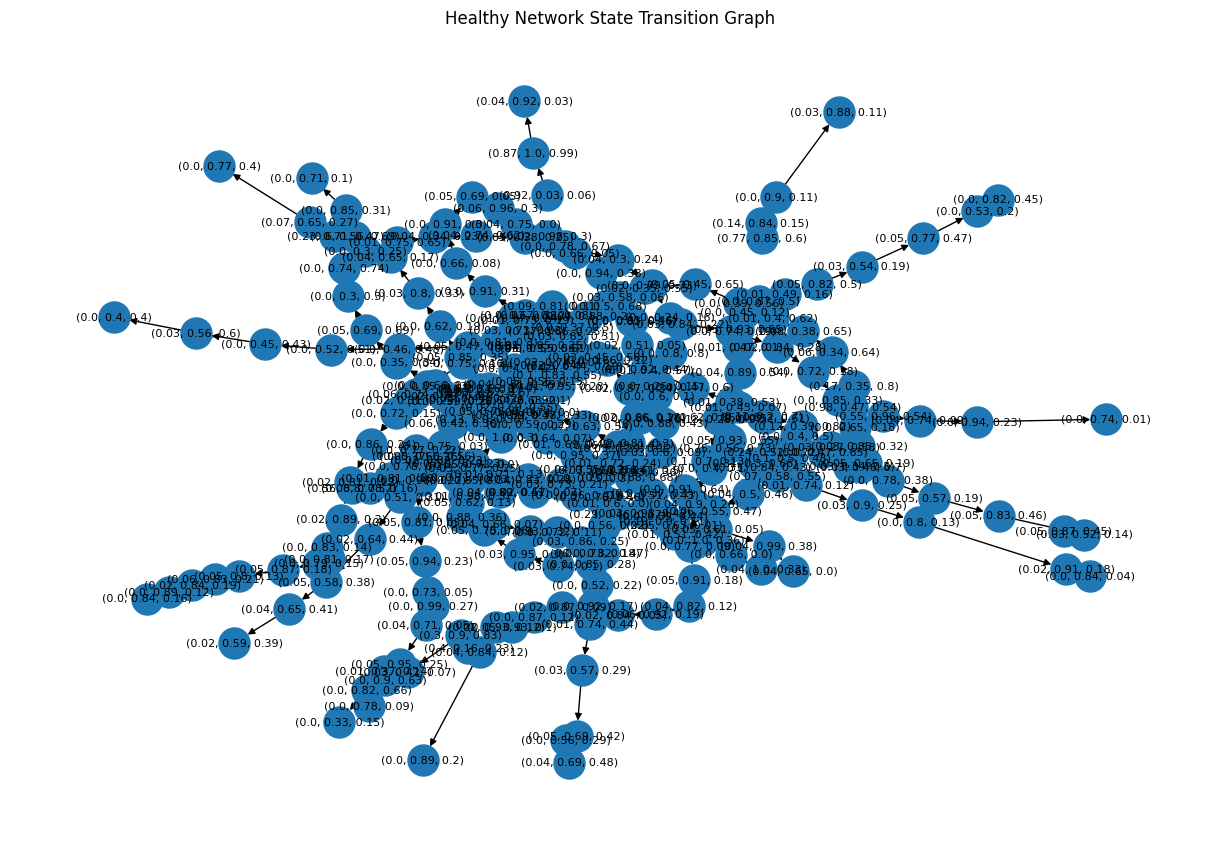

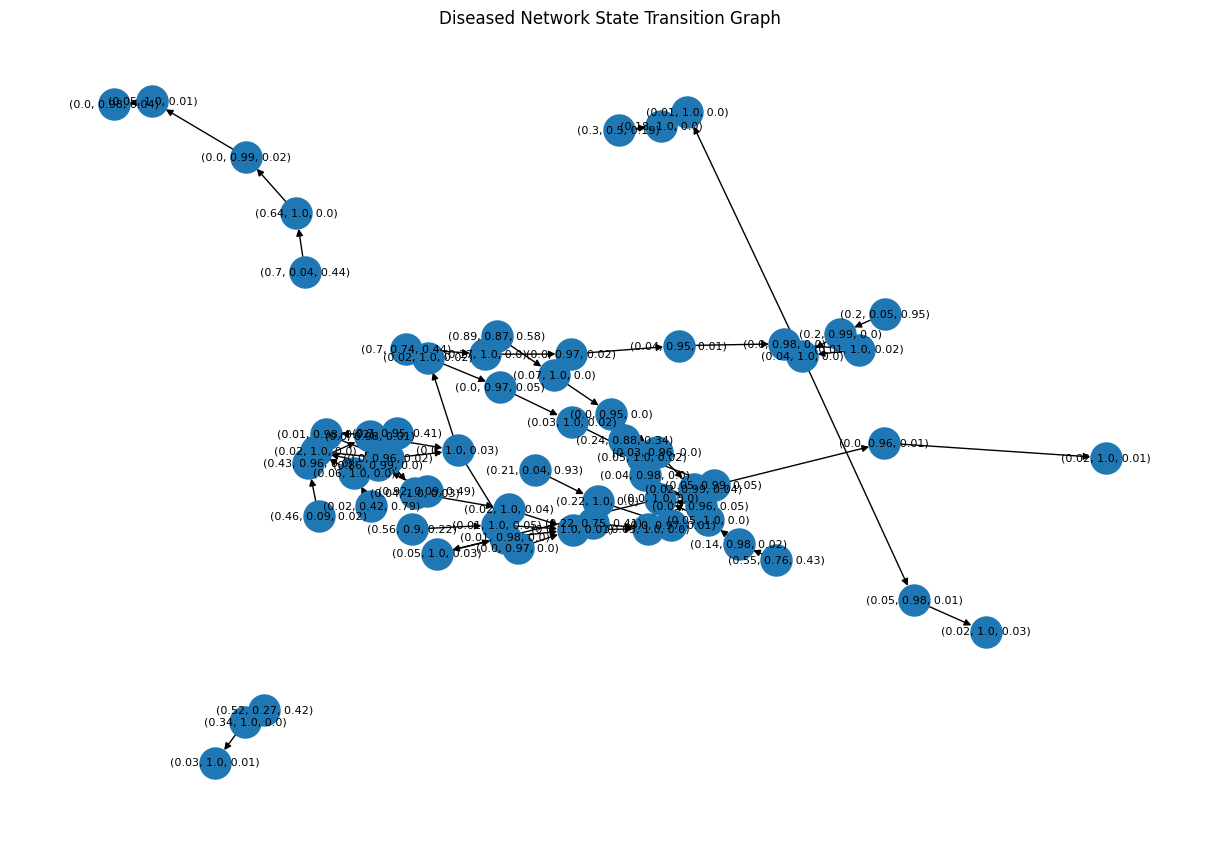

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define fuzzy logic functions
def fuzzy_and(a, b):
    return a * b

def fuzzy_or(a, b):
    return a + b - (a * b)

def fuzzy_not(a):
    return 1 - a

# Fuzzy update rules for the network in healthy and diseased states
def update_Isl1(current_state, disease=False):
    return fuzzy_and(current_state["Isl1"], fuzzy_not(current_state["Nkx2.5"]))

def update_Nkx2_5(current_state, disease=False):
    return 1.0 if disease else fuzzy_or(current_state["Isl1"], fuzzy_not(current_state["Tbx5"]))

def update_Tbx5(current_state, disease=False):
    return 0.0 if disease else fuzzy_not(current_state["Nkx2.5"])

# Add slight random noise to introduce uncertainty
def add_uncertainty(value, uncertainty=0.05):
    noise = np.random.uniform(-uncertainty, uncertainty)
    return min(1.0, max(0.0, value + noise))

# Update network function with fuzziness and uncertainty
def update_network(current_state, disease=False):
    next_state = {
        "Isl1": add_uncertainty(update_Isl1(current_state, disease)),
        "Nkx2.5": add_uncertainty(update_Nkx2_5(current_state, disease)),
        "Tbx5": add_uncertainty(update_Tbx5(current_state, disease))
    }
    return next_state

# Function to check if two states are approximately equal (to handle fuzzy values)
def states_are_equal(state1, state2, tolerance=0.01):
    return all(abs(state1[gene] - state2[gene]) < tolerance for gene in state1)

# Run the simulation and detect fixed points and cycles
def simulate_until_attractor(initial_state, disease=False, max_steps=50, tolerance=0.01):
    current_state = initial_state
    state_history = []

    for step in range(max_steps):
        next_state = update_network(current_state, disease)
        state_history.append(current_state)

        # Check if we’ve seen this state before (detect cycles)
        for i, previous_state in enumerate(state_history[:-1]):
            if states_are_equal(next_state, previous_state, tolerance):
                cycle_period = step - i + 1
                return state_history[:i + 1], next_state, "Cycle", cycle_period

        # Check if the state is stable (detect fixed points)
        if states_are_equal(next_state, current_state, tolerance):
            return state_history, next_state, "Fixed Point", 1

        current_state = next_state

    return state_history, None, "No Attractor", 0  # No attractor found within max steps

# Run simulations from multiple initial states and find fixed points and cycles
def find_fixed_points_and_cycles(num_initial_states=10, disease=False):
    attractors = {"Fixed Points": [], "Cycles": []}
    transition_graph = nx.DiGraph()

    for i in range(num_initial_states):
        initial_state = {gene: np.random.rand() for gene in ["Isl1", "Nkx2.5", "Tbx5"]}
        state_history, attractor, attractor_type, period = simulate_until_attractor(initial_state, disease)

        # Track attractors and periods
        attractor_key = tuple(round(v, 2) for v in attractor.values()) if attractor else None
        if attractor_key:
            if attractor_type == "Fixed Point":
                attractors["Fixed Points"].append(attractor_key)
            elif attractor_type == "Cycle":
                attractors["Cycles"].append((attractor_key, period))

        # Add states and transitions to the graph
        for j in range(len(state_history) - 1):
            transition_graph.add_edge(
                tuple(round(v, 2) for v in state_history[j].values()),
                tuple(round(v, 2) for v in state_history[j + 1].values())
            )

    return attractors, transition_graph

# Plotting function for state transition graph
def plot_state_transition_graph(transition_graph, title="State Transition Graph"):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(transition_graph)
    nx.draw(transition_graph, pos, with_labels=True, node_size=500, font_size=8, font_color="black")
    plt.title(title)
    plt.show()

# Run attractor analysis for healthy and diseased conditions
attractors_healthy, transition_graph_healthy = find_fixed_points_and_cycles(num_initial_states=15, disease=False)
attractors_disease, transition_graph_disease = find_fixed_points_and_cycles(num_initial_states=15, disease=True)

# Display attractors and plot transition graphs
print("Healthy Network Attractors:")
print("Fixed Points:", len(attractors_healthy["Fixed Points"]))
print("Cycles and their Periods:", [(cycle, period) for cycle, period in attractors_healthy["Cycles"]])

print("\nDiseased Network Attractors:")
print("Fixed Points:", len(attractors_disease["Fixed Points"]))
print("Cycles and their Periods:", [(cycle, period) for cycle, period in attractors_disease["Cycles"]])

# Plot transition graphs
plot_state_transition_graph(transition_graph_healthy, title="Healthy Network State Transition Graph")
plot_state_transition_graph(transition_graph_disease, title="Diseased Network State Transition Graph")



Reduced Variability Due to Overexpression or Loss of Function


In a disease state, specific genes may become overexpressed (constantly “on”) or suffer loss of function (constantly “off”). This restricts the range of possible states for these genes, effectively simplifying the network's dynamics.
When fewer genes are able to fluctuate, the network becomes less dynamic and more prone to settle into fixed states rather than exploring a diverse set of possible transitions.